# Titanic Exploratory Analysis

I will be using the Titanic dataset to answer some questions:
1. Who was on board?
2. Where did the passengers come from?
3. Which passengers were travelling with family?
4. Which passengers were more likely to survive?
5. Did the deck that the passengers were travelling on affect survival?

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

titanic = pd.read_csv("titanic/train.csv")

In [2]:
titanic.set_index("PassengerId", inplace = True)

#Changing the embarkment points from initials to the full name for future graphs:

titanic["Embarked"].replace("S", "Southampton", inplace = True)
titanic["Embarked"].replace("C", "Cherbourg", inplace = True)
titanic["Embarked"].replace("Q", "Queenstown", inplace = True)

In [3]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton


### Question 1: "Who was on board?"
Here I explore how many passengers were male or female, in each class, ages, and interactions between these variables.

Text(0, 0.5, 'No. of Passengers')

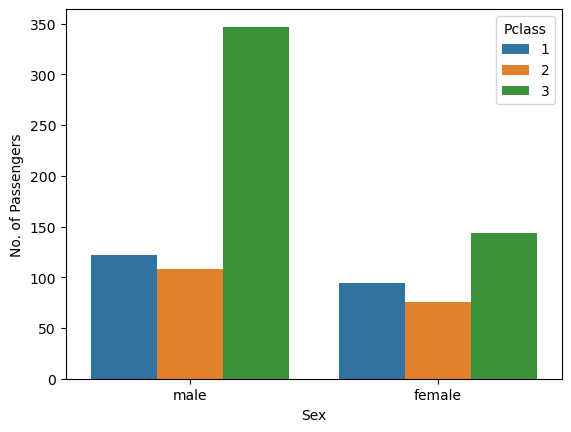

In [4]:
sns.countplot(data = titanic, x = "Sex", hue = "Pclass")
plt.ylabel("No. of Passengers")

In [5]:
#Creating a "passenger_type" column, that separates out children from males and females.

def male_female_child(passenger):
    Age, Sex = passenger
    if Age < 18:
        return "child"
    else:
        return Sex
    
titanic["passenger_type"] = titanic[["Age","Sex"]].apply(male_female_child, axis = 1)

Text(0.5, 0, 'Passenger Class')

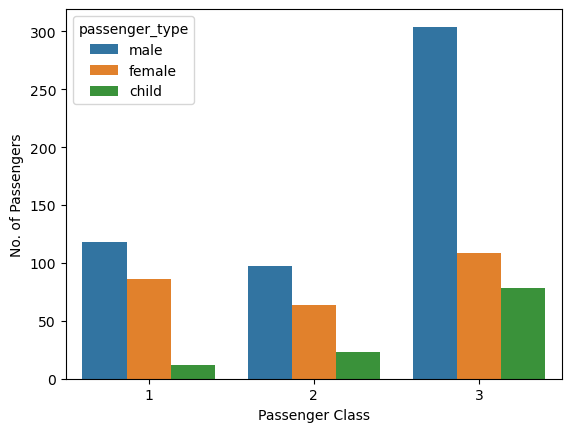

In [6]:
#Graph to show number of passengers in each class

sns.countplot(data = titanic, x = "Pclass", hue = "passenger_type")
plt.ylabel("No. of Passengers")
plt.xlabel("Passenger Class")

Text(0, 0.5, 'No. of Passengers')

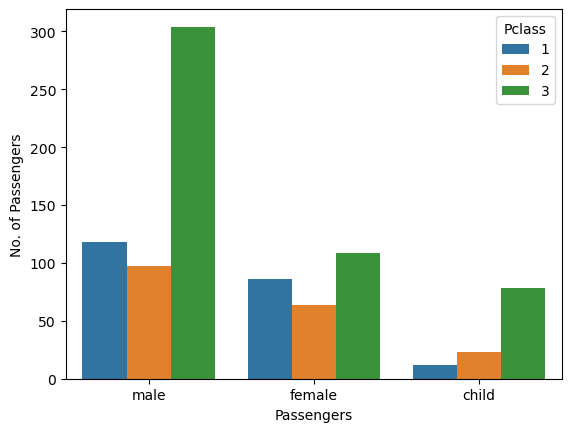

In [7]:
#Graph to show passengers in each class by male, female, and child.

sns.countplot(data = titanic, x = "passenger_type", hue = "Pclass")
plt.xlabel("Passengers")
plt.ylabel("No. of Passengers")

<Axes: xlabel='Age', ylabel='Count'>

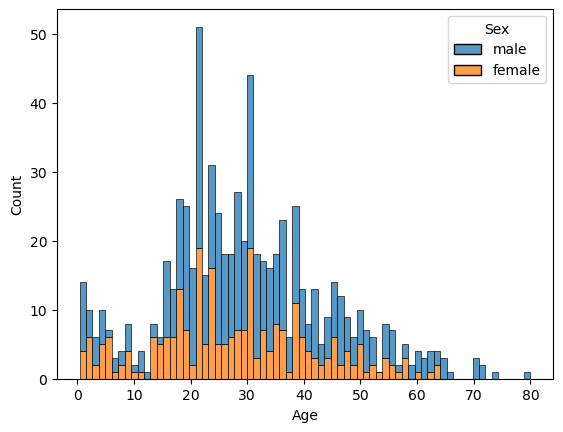

In [8]:
#Histogram and line graph to show age and sex distribution

sns.histplot(data=titanic, x="Age", hue = "Sex", bins = 70, multiple = "stack")

<Axes: xlabel='Age', ylabel='Density'>

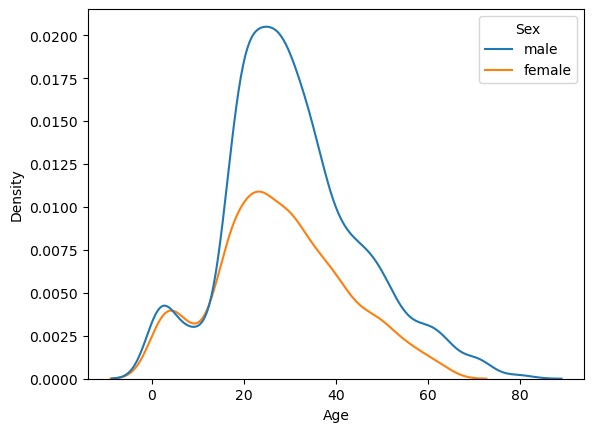

In [9]:
sns.kdeplot(data=titanic, x = "Age", hue = "Sex", bw_adjust=0.7)

Text(0, 0.5, 'No. of Passengers')

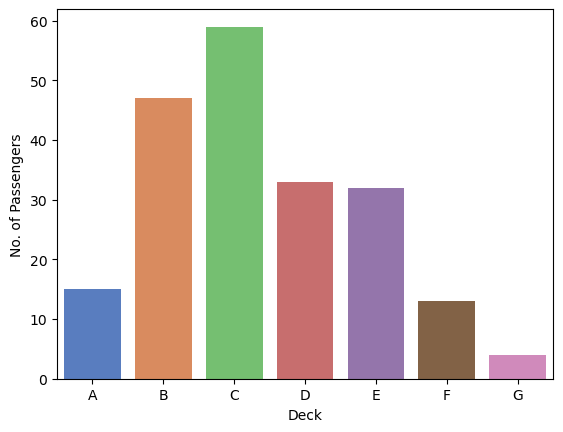

In [10]:
#Creating a "deck" column by taking first character from Cabin number:

titanic['deck'] = titanic['Cabin'].dropna().astype(str).str[0]

#and dropping a random "T" variable, not to skew the data:

titanic = titanic[titanic["deck"] != "T"]
#Graph to show number of passengers staying on each deck:

sns.countplot(data= titanic, x= "deck", palette= "muted", order= ["A", "B", "C","D","E","F","G"])
plt.xlabel("Deck")
plt.ylabel("No. of Passengers")

### Question 2: Where did the passengers come from?

Text(0, 0.5, 'No. of Passengers')

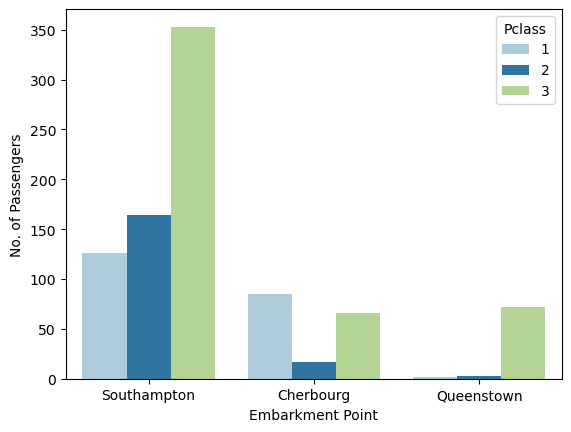

In [11]:
#Graph to show no of passengers embarking at each location by passenger class:
sns.countplot(data= titanic, x= "Embarked", hue= "Pclass", palette= "Paired")
plt.xlabel("Embarkment Point")
plt.ylabel("No. of Passengers")
#Most first class passengers were coming from Southhampton, and the least were coming from Queenstown.
#Could look into socio-economic status of each area...

### Question 3: Which passengers were travelling with family?

In [13]:
#Creating "Companions" column to see who is travelling with or without family

titanic = titanic.copy()
titanic["Companions"] = titanic["SibSp"] + titanic["Parch"]

def replace_values(x):
    if x > 0:
        return "With Family"
    else:
        return "Without Family"

titanic["Companions"] = titanic["Companions"].apply(replace_values)


Text(0, 0.5, 'No. of Passengers')

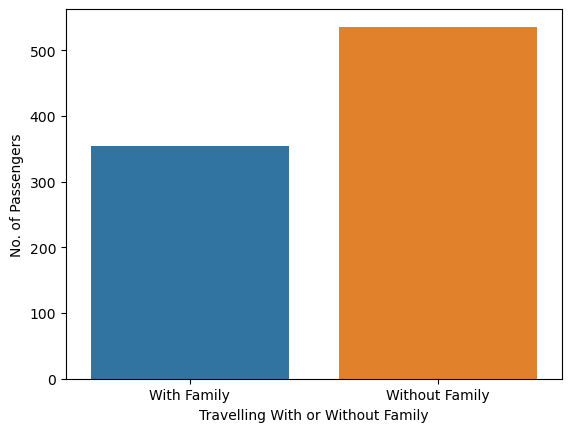

In [14]:
sns.countplot(data= titanic, x= "Companions")
plt.xlabel("Travelling With or Without Family")
plt.ylabel("No. of Passengers")

### Question 4: Who was more likely to survive?

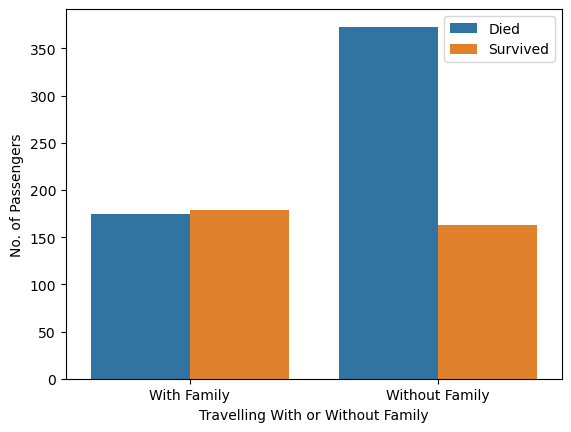

In [15]:
sns.countplot(data= titanic, x= "Companions", hue= "Survived")
plt.xlabel("Travelling With or Without Family")
plt.ylabel("No. of Passengers")
plt.legend(labels= ["Died", "Survived"])

# Graph showing that slightly more passengers travelling without family died.

Text(0, 0.5, 'No. of Passengers in Each Class')

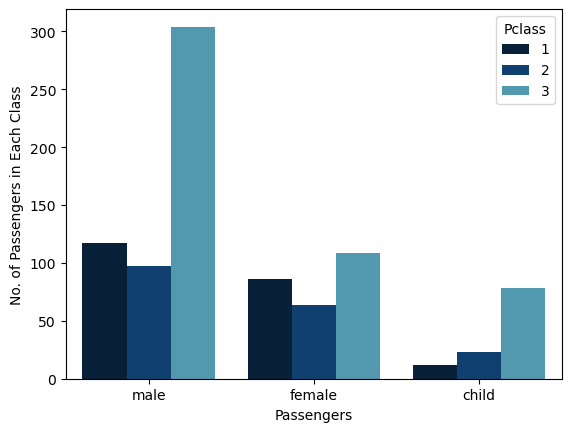

In [16]:
sns.countplot(data= titanic, x= "passenger_type", hue="Pclass", palette= "ocean")
plt.xlabel("Passengers")
plt.ylabel("No. of Passengers in Each Class")

#Graph showing number of males, females, and children travelling in each class to compare with next graph.

Text(0.5, 0, 'Passengers')

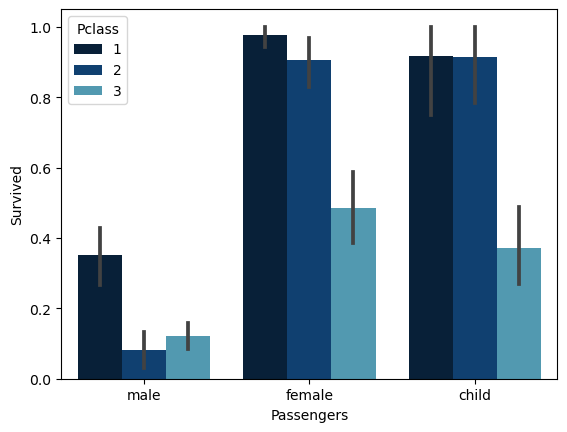

In [17]:
sns.barplot(data= titanic, x= "passenger_type", y= "Survived", hue= "Pclass", palette= "ocean")
plt.xlabel("Passengers")
#Graph showing how many males, females, and children survied in each class.
#Showing that more males died in every class, and that more passengers in the first and second classes survived
#compared to third class.

Text(0, 0.5, 'No. of Passengers who Survived')

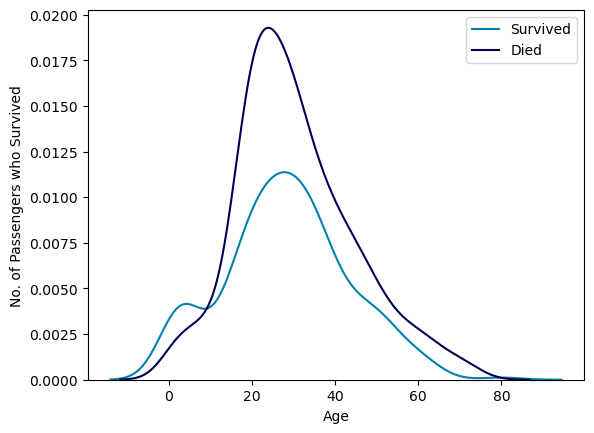

In [18]:
sns.kdeplot(data= titanic, x= "Age", hue= "Survived", palette= "ocean")
plt.legend(labels= ["Survived", "Died"])
plt.xlabel("Age")
plt.ylabel("No. of Passengers who Survived")
#Line graph showing that slightly more younger passengers survived than older passengers.

### Question 5: Did the deck affect survival rate?

In [19]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_type,deck,Companions
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,male,NaN,With Family
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female,C,With Family
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female,NaN,Without Family
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,female,C,With Family
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,male,NaN,Without Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton,male,NaN,Without Family
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton,female,B,Without Family
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton,female,NaN,With Family


<Axes: xlabel='deck', ylabel='count'>

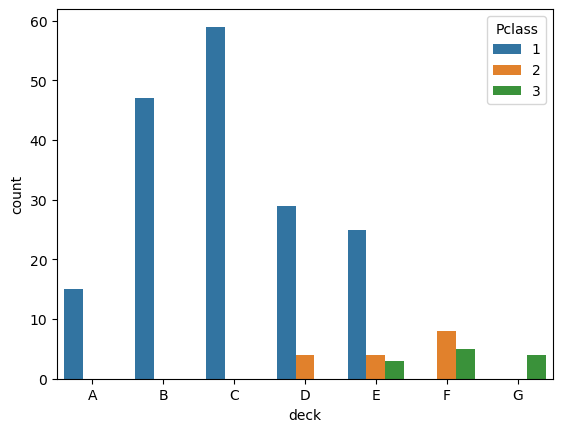

In [20]:
sns.countplot(data= titanic, x= "deck", hue= "Pclass", order= ["A", "B", "C","D","E","F","G"])
#This graph shows that first class passengers were more likely to stay on higher decks.
#It seems that many of the cabin numbers for second and third class passengers may have been null objects that were dropped
# as there is not much data on these.

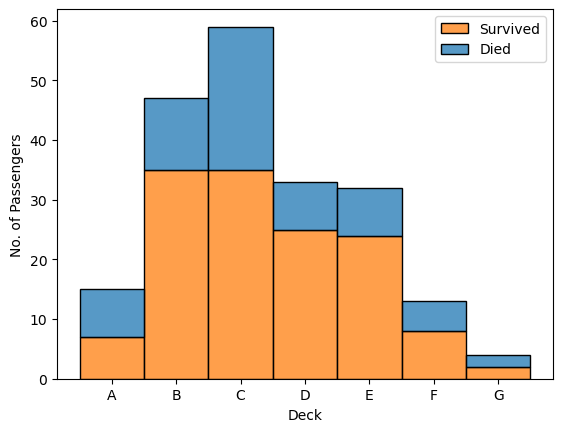

In [21]:
df= titanic
df.sort_values("deck", inplace=True)

sns.histplot(data= df, x= "deck", hue= "Survived", multiple= "stack")
plt.xlabel("Deck")
plt.ylabel("No. of Passengers")
plt.legend(labels= ["Survived", "Died"])
#Graph showing that survival rate is slightly skewed to the higher decks, where the first class passengers were travelling.